<a href="https://colab.research.google.com/github/Shewitte/Sentiment-Analysis-for-Amharic-Language-using-Twitter-Dataset/blob/main/Shewit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow numpy pandas scikit-learn matplotlib nltk
!pip install amharic-tools

ERROR: Could not find a version that satisfies the requirement amharic-tools (from versions: none)
ERROR: No matching distribution found for amharic-tools


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [15]:
data = pd.read_csv('/content/amharic_memes.csv')


In [18]:
data.head()

,text,label
0,ሰላም FB ሳትጠቀም ኮሜንት ታነባለ ፍናን ደብዳቤ ሳታነብ የፍቅር መሆኑን...,negative
1,ከ ፍናን የምትበልጥ ቆንጆ አርቲስት ካሳየኸኝ ኢትዮጵያ የሚለውን የ ሀጫሉ...,negative
2,እቺ ልጅ በርገር ብትበላ ዳናይትን ፈስታ ሰላም ተስፋዬን አርታ ቤቲን ታስ...,negative
3,የለበሰው ልብስ እና ጫማ ተበትኖ ድጋሚ ቢሰፋ ሙሉ የኢትዮጵያን ህዝብ አል...,neutral
4,ይሔ ልጅ ግን ሀቂቃን ዛሬ ነው እንዴ የሰማው,negative


In [19]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1b6BAVvR15Jpx06qq-umGJcgg21HeMCJ7J4vh6jXqpQA#gid=0


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [23]:
data['label'] = data['label'].map({'positive': 'positive', 'negative': 'negative', 'neutral': 'neutral'})

In [35]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])


In [36]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'].values, test_size=0.2, random_state=42)


In [25]:
data['text'] = data['text'].astype(str)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

In [26]:
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'].values, test_size=0.2, random_state=42)

In [40]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length))  # Adjust embedding dimension as needed
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Example using Adam optimizer and sparse_categorical_crossentropy loss

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 1.0779
Test Accuracy: 100.00%


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

In [45]:
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding
embedding_dim = 100

In [46]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))  # assuming 3 classes: positive, negative, neutral

In [47]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8887 - loss: 0.4019 - val_accuracy: 1.0000 - val_loss: 1.0665e-05
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 1.0000 - loss: 8.9728e-06 - val_accuracy: 1.0000 - val_loss: 6.5746e-06
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 6.5230e-06 - val_accuracy: 1.0000 - val_loss: 6.0085e-06
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 6.0642e-06 - val_accuracy: 1.0000 - val_loss: 5.5444e-06
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 5.4992e-06 - val_accuracy: 1.0000 - val_loss: 5.1663e-06
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 5.0424e-06 - val_accuracy: 1.0000 - val_loss: 4.7215e-06
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 4.6656e-06 - val_accuracy: 1.0000 - val_loss: 4.3277e-06
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accura

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.2412e-06
Test Loss: 0.0000, Test Accuracy: 1.0000


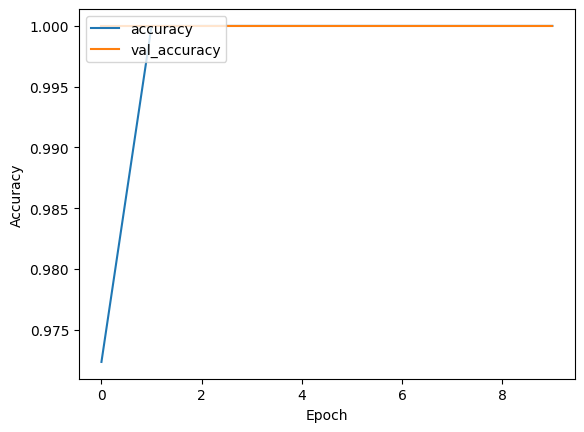

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [51]:
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded)
    return np.argmax(prediction)

In [52]:
new_meme_text = "your Amharic meme text here"
predicted_label = predict_sentiment(new_meme_text)
print("Predicted Sentiment: ", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Predicted Sentiment:  0
